# Final Project: Stock Market Time Series Analysis

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
stocks = pd.read_csv('final_all_stocks.csv',parse_dates = ['Date'])
stocks.head()

,Unnamed: 0,Date,Close,High,Low,Name,Open,Volume,_id,Price,Growth
0,0,2006-01-03,79.11,79.35,77.24,MMM,77.76,3117200,5beefd9021b77099b8ddbeea,78.3650,0.000000
1,1,2006-01-06,78.63,78.90,77.64,MMM,78.64,2479500,5beefd9021b77099b8ddbeeb,78.4525,0.001117
2,2,2006-01-04,78.71,79.49,78.25,MMM,79.49,2558000,5beefd9021b77099b8ddbeec,78.9850,0.007912
3,3,2006-01-09,79.02,79.83,78.46,MMM,78.50,1845600,5beefd9021b77099b8ddbeed,78.9525,0.007497
4,4,2006-01-05,77.99,78.65,77.56,MMM,78.41,2529500,5beefd9021b77099b8ddbeee,78.1525,-0.002712


In [4]:
amzn = stocks[stocks['Name'] == "AMZN"]
google = stocks[stocks['Name'] == "GOOGL"]
ibm = stocks[stocks['Name'] == "IBM"]
gs = stocks[stocks['Name'] == "GS"]

## AMAZON STOCK ANALYSIS

In [5]:
amzn = amzn.sort_values(by = 'Date')
amzn = amzn.set_index('Date')
amzn['Returns'] = amzn['Close'].pct_change()
amzn = amzn.dropna()
amzn.head()

,Unnamed: 0,Close,High,Low,Name,Open,Volume,_id,Price,Growth,Returns
Date,,,,,,,,,,,
2006-01-04,87575,47.25,47.73,46.69,AMZN,47.48,7440914,5beefd9221b77099b8df1558,47.2875,0.000000,-0.006936
2006-01-05,87576,47.65,48.20,47.11,AMZN,47.16,5417258,5beefd9221b77099b8df1559,47.5300,0.005128,0.008466
2006-01-06,87578,47.87,48.58,47.32,AMZN,47.97,6154285,5beefd9221b77099b8df155b,47.9350,0.013693,0.004617
2006-01-09,87577,47.08,47.10,46.40,AMZN,46.55,8945056,5beefd9221b77099b8df155a,46.7825,-0.010679,-0.016503
2006-01-10,87579,45.65,46.75,45.36,AMZN,46.41,9686957,5beefd9221b77099b8df155c,46.0425,-0.026328,-0.030374


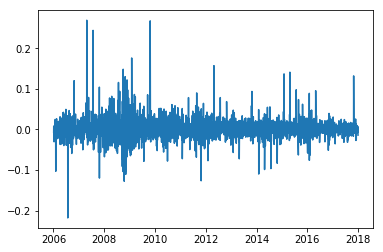

In [6]:
plt.plot(amzn['Returns'])
plt.show()

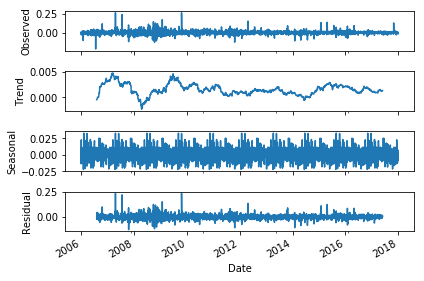

In [7]:
decomposition = seasonal_decompose(amzn['Returns'], model='additive',freq = 300)
fig = decomposition.plot()
plt.show()

In [8]:
stat = adfuller(amzn['Returns'])
print("The p-value obtained from the Dicky-Fuller Test is: ",stat[1])

The p-value obtained from the Dicky-Fuller Test is:  0.0


Our time-series is now stationary

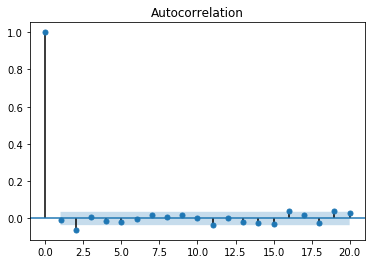

In [9]:
plot_acf(amzn['Returns'],lags = 20)

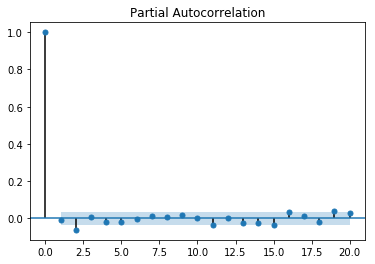

In [10]:
plot_pacf(amzn['Returns'],lags = 20,method='ols')

### ARMA MODEL

In [59]:
for i in range(9):
    model = ARMA(amzn['Returns'],order= (i,i))
    result  = model.fit()
    print('At order=',i,', AIC = ',result.aic)`

At order= 0 AIC =  -13648.138559976836
At order= 1 AIC =  -13649.094553064078
At order= 2 AIC =  -13652.569149897361
At order= 3 AIC =  -13656.75107815894
At order= 4 AIC =  -13662.267058316258
At order= 5 AIC =  -13659.248682529545
At order= 6 AIC =  -13659.39944098589
At order= 7 AIC =  -13630.265163337415
At order= 8 AIC =  -13643.245147175054


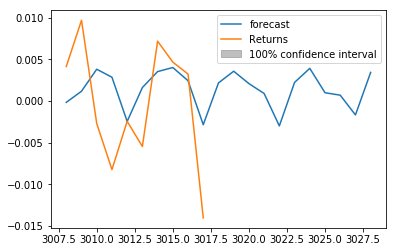

In [73]:
result.plot_predict(start = 3008 ,end = 3028,alpha = 0)

In [55]:
model = ARMA(amzn['Returns'],order= (8,8))
result  = model.fit()
result.aic

-13643.245147175054

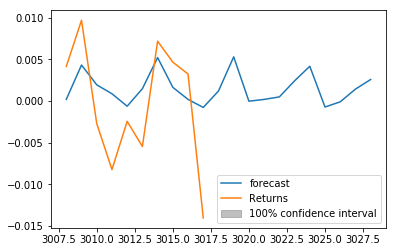

In [56]:
result.plot_predict(start = 3008 ,end = 3028,alpha = 0)

### ARIMA MODEL

In [101]:
aic_vals = []
for i in range(3):
    model = ARIMA(amzn['Returns'],order=(0,i,0))
    result = model.fit()
    aic_vals.append(result.aic)
    if i == 0: 
        continue
        
    print("At order =",i-1," AIC Value = ",aic_vals[i-1])


At order = 0  AIC Value =  -13648.138559976836
At order = 1  AIC Value =  -11530.468923552204


In [93]:
model = ARIMA(amzn['Returns'],order=(0,1,0))
result = model.fit()
print(result.aic)

-11530.468923552204


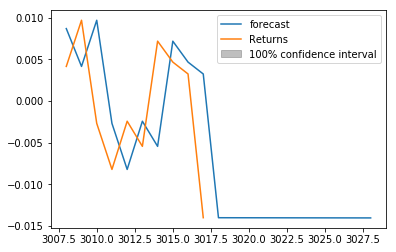

In [94]:
result.plot_predict(start = 3008 ,end = 3028,alpha = 0)

## GOOGLE STOCK ANALYSIS

In [106]:
google = google.sort_values(by = 'Date')
google = google.set_index('Date')
google['Returns'] = google['Close'].pct_change()
google = google.dropna()
google.head()

,Unnamed: 0,Close,High,Low,Name,Open,Volume,_id,Price,Growth,Returns
Date,,,,,,,,,,,
2006-01-04,84556,222.84,224.70,220.09,GOOGL,222.17,15292353,5beefd9221b77099b8df098a,222.450,0.038673,0.023000
2006-01-05,84557,225.85,226.00,220.97,GOOGL,223.22,10815661,5beefd9221b77099b8df098b,224.010,0.045957,0.013507
2006-01-06,84558,233.06,235.49,226.85,GOOGL,228.66,17759521,5beefd9221b77099b8df098c,231.015,0.078665,0.031924
2006-01-09,84560,233.68,236.94,230.70,GOOGL,233.44,12795837,5beefd9221b77099b8df098e,233.690,0.091155,0.002660
2006-01-10,84559,235.11,235.36,231.25,GOOGL,232.44,9104719,5beefd9221b77099b8df098d,233.540,0.090455,0.006119


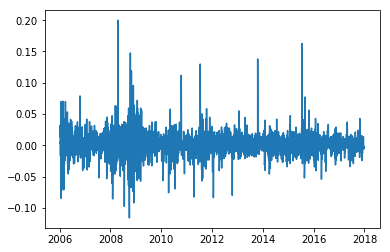

In [109]:
plt.plot(google['Returns'])
plt.show()

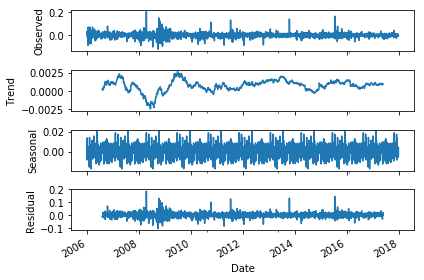

In [110]:
decomposition = seasonal_decompose(google['Returns'], model='additive',freq = 300)
fig = decomposition.plot()
plt.show()

In [111]:
stat = adfuller(google['Returns'])
print("The p-value obtained from the Dicky-Fuller Test is: ",stat[1])

The p-value obtained from the Dicky-Fuller Test is:  4.390564377126583e-19


Our time-series is now stationary

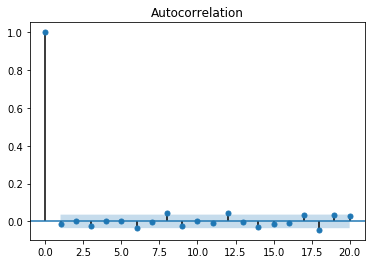

In [113]:
plot_acf(google['Returns'],lags = 20)

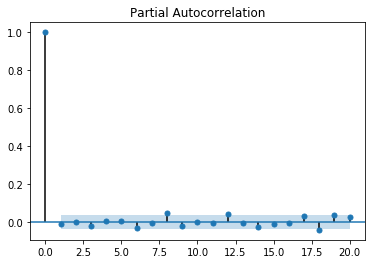

In [114]:
plot_pacf(google['Returns'],lags = 20,method='ols')

In [117]:
for i in range(2):
    model = ARMA(google['Returns'],order= (i,i))
    result  = model.fit()
    print('At order=',i,', AIC = ',result.aic)

At order= 0 , AIC =  -15531.60480649782
At order= 1 , AIC =  -15528.481826629399


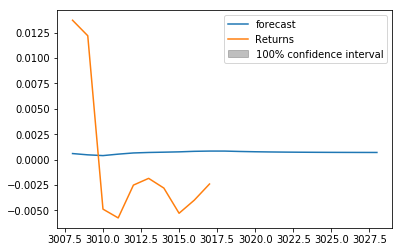

In [118]:
result.plot_predict(start = 3008 ,end = 3028,alpha = 0)

In [55]:
model = ARMA(amzn['Returns'],order= (8,8))
result  = model.fit()
result.aic

-13643.245147175054

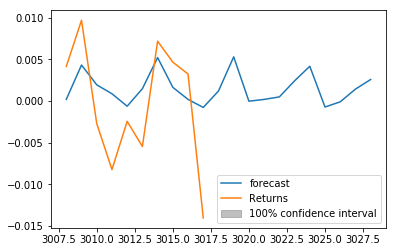

In [56]:
result.plot_predict(start = 3008 ,end = 3028,alpha = 0)

### ARIMA MODEL

In [43]:
aic_vals = []
for i in range(3):
    model = ARIMA(google['Returns'],order=(0,i,0))
    result = model.fit()
    aic_vals.append(result.aic)
    print("At order =",i," AIC Value = ",aic_vals[i-1])


At order = 0  AIC Value =  -15531.60480649782
At order = 1  AIC Value =  -15531.60480649782
At order = 2  AIC Value =  -13400.513791807607


In [45]:
model = ARIMA(google['Returns'],order=(0,1,0))
result = model.fit()
print(result.aic)

-13400.513791807607


In [48]:
google.tail()

,Unnamed: 0,Close,High,Low,Name,Open,Volume,_id,Price,Growth,Returns
Date,,,,,,,,,,,
2017-12-22,87569,1068.86,1071.72,1067.64,GOOGL,1070.00,889446,5beefd9221b77099b8df1552,1069.5550,3.994012,-0.001858
2017-12-26,87571,1065.85,1068.86,1058.64,GOOGL,1068.64,918767,5beefd9221b77099b8df1554,1065.4975,3.975066,-0.002816
2017-12-27,87570,1060.20,1068.27,1058.38,GOOGL,1066.60,1116203,5beefd9221b77099b8df1553,1063.3625,3.965097,-0.005301
2017-12-28,87572,1055.95,1064.84,1053.38,GOOGL,1062.25,994249,5beefd9221b77099b8df1555,1059.1050,3.945218,-0.004009
2017-12-29,87573,1053.40,1058.05,1052.70,GOOGL,1055.49,1180340,5beefd9221b77099b8df1556,1054.9100,3.925631,-0.002415


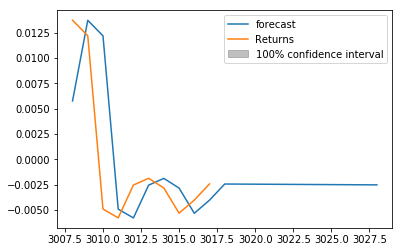

In [47]:
result.plot_predict(start = 3008 ,end = 3028,alpha = 0)

## GOLDMAN SACHS STOCK ANALYSIS

In [49]:
gs = gs.sort_values(by = 'Date')
gs = gs.set_index('Date')
gs['Returns'] = gs['Close'].pct_change()
gs = gs.dropna()
gs.head()

,Unnamed: 0,Close,High,Low,Name,Open,Volume,_id,Price,Growth,Returns
Date,,,,,,,,,,,
2006-01-04,33219,127.09,128.91,126.38,GS,127.35,4862000,5beefd9121b77099b8de40ce,127.4325,0.000962,-0.013812
2006-01-05,33220,127.04,127.32,125.61,GS,126.00,3717600,5beefd9121b77099b8de40cf,126.4925,-0.006421,-0.000393
2006-01-06,33222,128.84,129.25,127.29,GS,127.29,4319600,5beefd9121b77099b8de40d1,128.1675,0.006736,0.014169
2006-01-09,33221,130.39,130.62,128.00,GS,128.50,4723500,5beefd9121b77099b8de40d0,129.3775,0.016240,0.012030
2006-01-10,33224,132.03,132.95,130.02,GS,130.05,5539800,5beefd9121b77099b8de40d3,131.2625,0.031046,0.012578


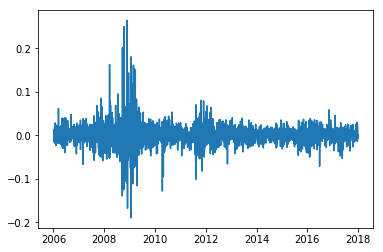

In [51]:
plt.plot(gs['Returns'])
plt.show()

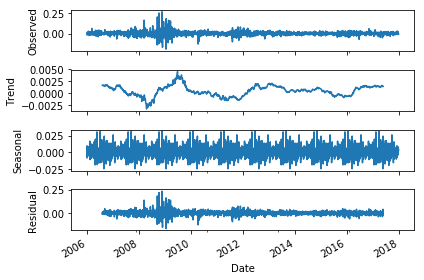

In [52]:
decomposition = seasonal_decompose(gs['Returns'], model='additive',freq = 300)
fig = decomposition.plot()
plt.show()

In [53]:
stat = adfuller(gs['Returns'])
print("The p-value obtained from the Dicky-Fuller Test is: ",stat[1])

The p-value obtained from the Dicky-Fuller Test is:  2.5003920586819636e-24


Our time-series is now stationary

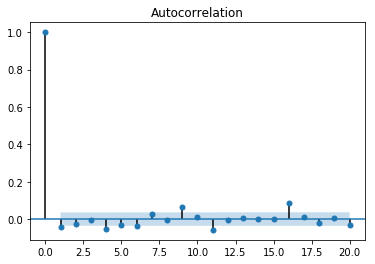

In [57]:
plot_acf(gs['Returns'],lags = 20)

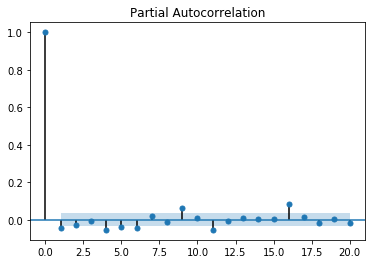

In [58]:
plot_pacf(gs['Returns'],lags = 20,method='ols')

In [60]:
aic_vals = []
for i in range(3):
    model = ARIMA(gs['Returns'],order=(0,i,0))
    result = model.fit()
    aic_vals.append(result.aic)
    print("At order =",i," AIC Value = ",aic_vals[i-1])


At order = 0  AIC Value =  -13970.912557996813
At order = 1  AIC Value =  -13970.912557996813
At order = 2  AIC Value =  -11743.505048451181


In [64]:
model = ARIMA(gs['Returns'],order=(0,1,0))
result = model.fit()
print(result.aic)

-11743.505048451181


In [65]:
gs.tail()

,Unnamed: 0,Close,High,Low,Name,Open,Volume,_id,Price,Growth,Returns
Date,,,,,,,,,,,
2017-12-22,36233,258.97,262.14,257.72,GS,261.66,2100623,5beefd9121b77099b8de4c97,260.1225,1.043221,-0.007816
2017-12-26,36234,257.72,259.20,256.00,GS,258.19,1289310,5beefd9121b77099b8de4c98,257.7775,1.024802,-0.004827
2017-12-27,36235,255.95,257.98,255.52,GS,257.98,1567928,5beefd9121b77099b8de4c99,256.8575,1.017575,-0.006868
2017-12-28,36236,256.50,257.00,255.10,GS,256.98,1301165,5beefd9121b77099b8de4c9a,256.3950,1.013942,0.002149
2017-12-29,36237,254.76,256.65,252.91,GS,255.87,2519253,5beefd9121b77099b8de4c9b,255.0475,1.003358,-0.006784


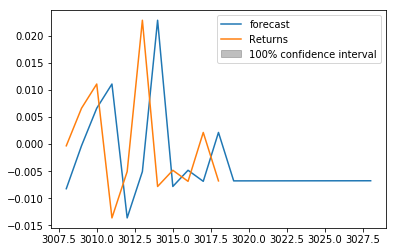

In [66]:
result.plot_predict(start = 3008 ,end = 3028,alpha = 0)